<a href="https://colab.research.google.com/github/mehdy28/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import numpy as np

In [177]:
#Importing the train and test datasets
train = pd.read_csv("https://raw.githubusercontent.com/mehdy28/Customer_Segmentation/main/data/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/mehdy28/Customer_Segmentation/main/data/Test.csv")

# **Exploratory Data Analysis: EDA**

In [178]:
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [179]:
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


### **We notice here that the 'Var_1' is the variable containing the categories so we will be changing it's name into Category**

In [180]:
train = train.rename(columns ={'Var_1': 'Category'})
train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [181]:
test = test.rename(columns ={'Var_1': 'Category'})
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Category         7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Category         2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [184]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64

In [185]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Category            32
Segmentation         0
dtype: int64

In [186]:
#Calculating the percentage of nan_values
def null_vals_prct(data):
    nan_p = []
    columns = data.columns
    for i in columns:
        prcnt = len(data[i][data[i].isna() == True]) / len(data[i])*100
        nan_p.append(prcnt)
    Nan_values = pd.DataFrame({'Features' : columns, 'NaN_Prcnt': nan_p}).sort_values(by = 'NaN_Prcnt', ascending = False)
    Nan_values = Nan_values[Nan_values.NaN_Prcnt > 0]
    return(Nan_values)

In [187]:
null_vals_prct(train)

,Features,NaN_Prcnt
6,Work_Experience,10.275161
8,Family_Size,4.152206
2,Ever_Married,1.735250
5,Profession,1.536936
4,Graduated,0.966782
9,Category,0.941993


In [188]:
null_vals_prct(test)

,Features,NaN_Prcnt
6,Work_Experience,10.239817
8,Family_Size,4.301485
2,Ever_Married,1.903312
5,Profession,1.446517
9,Category,1.218120
4,Graduated,0.913590


We notice here that the % of null values is small in these datasets so we will proceed by filling the numerical null values by their means and the categorical ones by their mode

In [189]:
#Filling train null vals
train.fillna(value={"Work_Experience":train["Work_Experience"].mean(), 
                    "Family_Size":train["Family_Size"].mean(), 
                    "Ever_Married": train["Ever_Married"].mode()[0], 
                    "Graduated": train["Graduated"].mode()[0], 
                    "Category": train["Category"].mode()[0],
                    "Profession": train["Profession"].mode()[0]}, inplace=True)
#Filling test null vals
test.fillna(value={"Work_Experience":test["Work_Experience"].mean(), 
                   "Family_Size":test["Family_Size"].mean(), 
                   "Ever_Married": test["Ever_Married"].mode()[0], 
                   "Graduated": test["Graduated"].mode()[0], 
                   "Category": test["Category"].mode()[0],
                   "Profession": test["Profession"].mode()[0]}, inplace=True)

## **Detecing and removing outliers:**

In [190]:
#Create a list of numeric culumns 
numerics = [ 'int64', 'float64']
numeric_col = train.select_dtypes(include=numerics).columns.tolist()
print(numeric_col)

['ID', 'Age', 'Work_Experience', 'Family_Size']


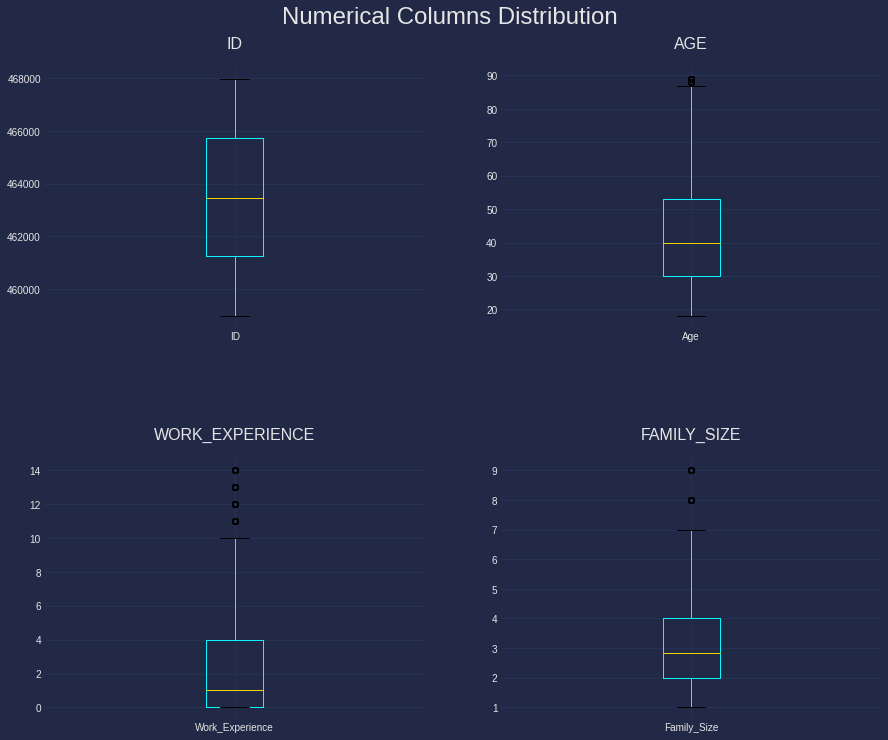

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
import mplcyberpunk
plt.style.use('cyberpunk')

# define subplot grid
fig, axs = plt.subplots(nrows=round(len(numeric_col)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

fig.suptitle("Numerical Columns Distribution", fontsize=24, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(numeric_col, axs.ravel()):
    # filter df for ticker and plot on specified axes
    train.boxplot(ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper(), fontsize=16, y=1.05)
    ax.set_xlabel("")

plt.show()

In [192]:
#Removing outliers
def Outliers_rem(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit, upper_limit
  data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
  return(data_clean)

In [193]:
train_clean = Outliers_rem(train)

<ipython-input-192-522ea5ee48fb>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]


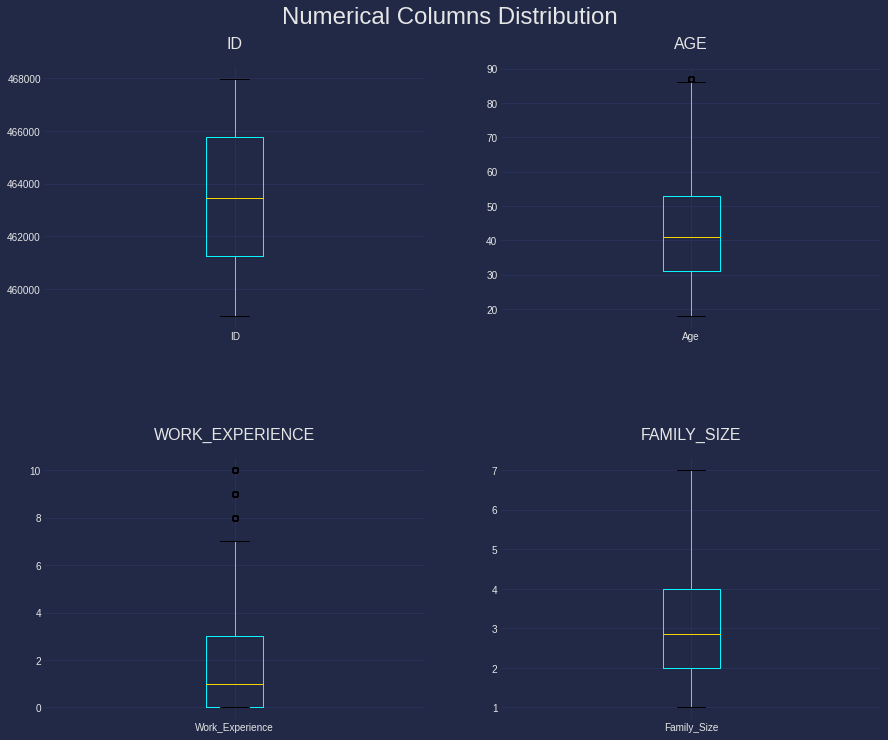

In [194]:
plt.style.use('cyberpunk')

# define subplot grid
fig, axs = plt.subplots(nrows=round(len(numeric_col)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

fig.suptitle("Numerical Columns Distribution", fontsize=24, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(numeric_col, axs.ravel()):
    # filter df for ticker and plot on specified axes
    train_clean.boxplot(ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper(), fontsize=16, y=1.05)
    ax.set_xlabel("")

plt.show()

In [195]:
#Create a list of numeric culumns 
numerics = [ 'int64', 'float64']
numeric_col = test.select_dtypes(include=numerics).columns.tolist()
print(numeric_col)

['ID', 'Age', 'Work_Experience', 'Family_Size']


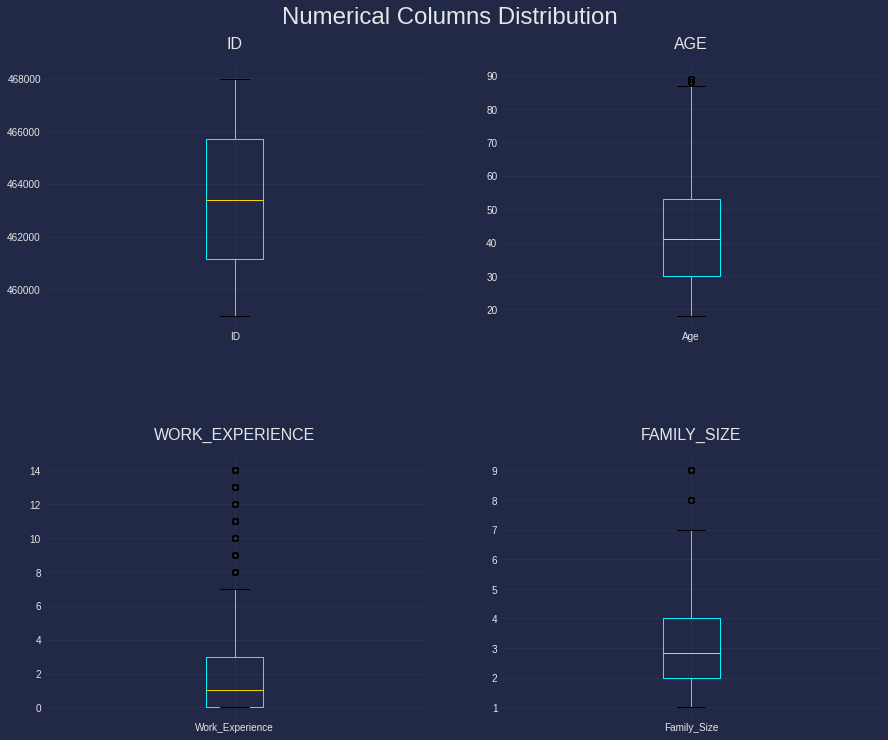

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
import mplcyberpunk
plt.style.use('cyberpunk')

# define subplot grid
fig, axs = plt.subplots(nrows=round(len(numeric_col)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

fig.suptitle("Numerical Columns Distribution", fontsize=24, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(numeric_col, axs.ravel()):
    # filter df for ticker and plot on specified axes
    test.boxplot(ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper(), fontsize=16, y=1.05)
    ax.set_xlabel("")

plt.show()

In [197]:
test_clean = Outliers_rem(test)

<ipython-input-192-522ea5ee48fb>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]


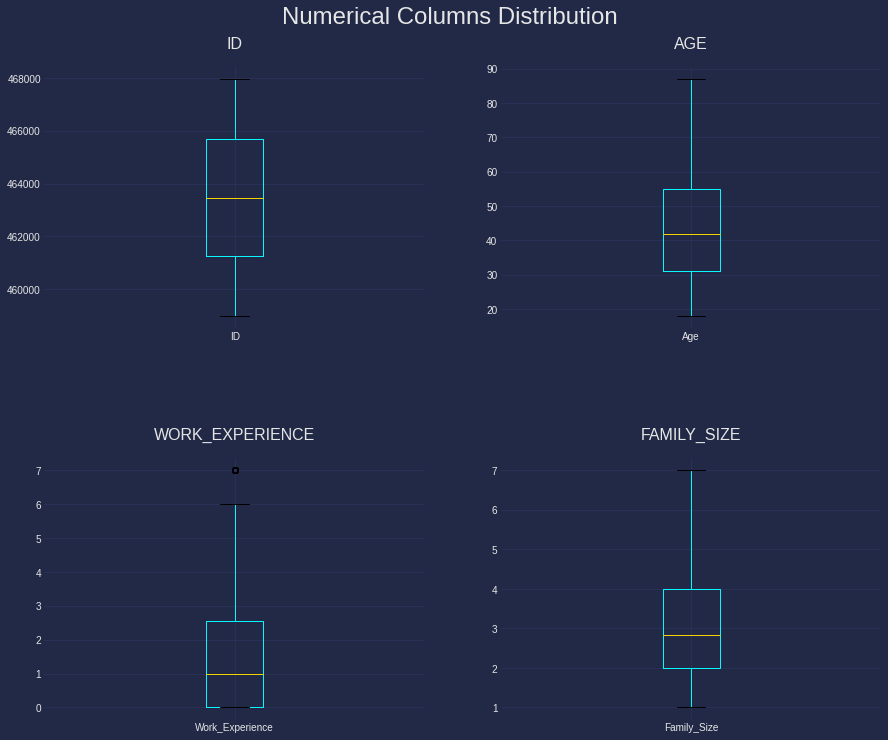

In [198]:
plt.style.use('cyberpunk')

# define subplot grid
fig, axs = plt.subplots(nrows=round(len(numeric_col)/2), ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

fig.suptitle("Numerical Columns Distribution", fontsize=24, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(numeric_col, axs.ravel()):
    # filter df for ticker and plot on specified axes
    test_clean.boxplot(ticker, ax=ax)
    # chart formatting
    ax.set_title(ticker.upper(), fontsize=16, y=1.05)
    ax.set_xlabel("")

plt.show()

## **Covert non-numerical values into numerical vaues:**

In [199]:
def get_encoded_dict(values):
    return {val:i for i, val in enumerate(values)}

In [200]:
#Train data Encoding
gender_dict = get_encoded_dict(train_clean.Gender.unique())
married_dict = get_encoded_dict(train_clean.Ever_Married.unique())
grad_dict = get_encoded_dict(train_clean.Graduated.unique())
Profession_dict = get_encoded_dict(train_clean.Profession.unique())
spend_dict = get_encoded_dict(train_clean.Spending_Score.unique())
cat_dict = get_encoded_dict(train_clean.Category.unique())
segment_dict = get_encoded_dict(train_clean.Segmentation.unique())
segment_dict

{'D': 0, 'A': 1, 'B': 2, 'C': 3}

In [201]:
encoded_dict = {
    'Gender' : gender_dict,
    'Ever_Married': married_dict,
    'Graduated' : grad_dict,
    'Profession': Profession_dict,
    'Spending_Score': spend_dict,
     'Category': cat_dict,
    'Segmentation': segment_dict
}

In [202]:
train_clean = train_clean.replace(encoded_dict)
train_clean.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,462809,0,0,22,0,0,1.000000,0,4.0,0,0
1,462643,1,1,38,1,1,2.641663,1,3.0,0,1
2,466315,1,1,67,1,1,1.000000,0,1.0,1,2
3,461735,0,1,67,1,2,0.000000,2,2.0,1,2
4,462669,1,1,40,1,3,2.641663,2,6.0,1,1


In [203]:
#Test data Encoding
gender_dict = get_encoded_dict(test_clean.Gender.unique())
married_dict = get_encoded_dict(test_clean.Ever_Married.unique())
grad_dict = get_encoded_dict(test_clean.Graduated.unique())
Profession_dict = get_encoded_dict(test_clean.Profession.unique())
spend_dict = get_encoded_dict(test_clean.Spending_Score.unique())
cat_dict = get_encoded_dict(test_clean.Category.unique())
segment_dict = get_encoded_dict(test_clean.Segmentation.unique())
segment_dict

{'B': 0, 'A': 1, 'C': 2, 'D': 3}

In [206]:
test_clean = test_clean.replace(encoded_dict)
test_clean.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,458989,1,1,36,1,1,0.000000,0,1.0,1,2
2,458996,1,1,69,0,4,0.000000,0,1.0,1,1
4,459001,1,0,19,0,8,2.552587,0,4.0,1,1
5,459003,0,1,47,1,6,0.000000,2,5.0,0,3
6,459005,0,1,61,1,6,5.000000,0,3.0,1,0


# **Model Building and testing**

### Splitting the dataset int test and train subsets

In [209]:
from sklearn.model_selection import train_test_split
X, y= train_clean.drop(['Segmentation'], axis=1) ,train_clean.Segmentation
# Divide data into training and validation subsets
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.18,random_state=0)

In [214]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,Balanced Accuracy


In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression(penalty='l2', max_iter=5000, multi_class='ovr', solver='liblinear')
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')


    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

Model Name:  LogisticRegression(max_iter=5000, multi_class='ovr', solver='liblinear')
Confusion matrix : 
 [[   0 1515]
 [   0 1778]]
Outcome values : 
 0 1515 0 1778
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1515
           0       0.28      1.00      0.44      1778

   micro avg       0.28      0.54      0.37      3293
   macro avg       0.14      0.50      0.22      3293
weighted avg       0.15      0.54      0.24      3293

Accuracy : 54.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : MCC
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 526  350]
 [ 377 1002]]
Outcome values : 
 526 350 377 1002
Classification report : 
               precision    recall  f1-score   support

           1       0.32     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-217-280ed6062917>:76: RuntimeWarning: invalid value 

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 624  346]
 [ 352 1217]]
Outcome values : 
 624 346 352 1217
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.41      0.40      1515
           0       0.64      0.68      0.66      1778

   micro avg       0.52      0.56      0.54      3293
   macro avg       0.51      0.55      0.53      3293
weighted avg       0.52      0.56      0.54      3293

Accuracy : 72.5 %
Precision : 63.9 %
Recall : 64.3 %
F1 Score : 0.641
Specificity or True Negative Rate : 77.6 %
Balanced Accuracy : 71.0 %
MCC : MCC
-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 608  351]
 [ 337 1164]]
Outcome values : 
 608 351 337 1164
Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.40      0.40      1515
           0      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-217-280ed6062917>:76: RuntimeWarning: invalid value 

Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 610  343]
 [ 355 1169]]
Outcome values : 
 610 343 355 1169
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.40      0.40      1515
           0       0.63      0.66      0.64      1778

   micro avg       0.52      0.54      0.53      3293
   macro avg       0.51      0.53      0.52      3293
weighted avg       0.52      0.54      0.53      3293

Accuracy : 71.8 %
Precision : 63.2 %
Recall : 64.0 %
F1 Score : 0.636
Specificity or True Negative Rate : 76.7 %
Balanced Accuracy : 70.4 %
MCC : MCC
-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 657  302]
 [ 333 1229]]
Outcome values : 
 657 302 333 1229
Classification report : 
               precision    recall  f1-score   support

           1       0.41      0.43      0.42      1515
 

In [218]:
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,Balanced Accuracy
0,LogisticRegression(),0.0,1515.0,0.0,1778.0,0.540,NaN,0.000,0.000,1.000,NaN,0.500
1,DecisionTreeClassifier(),545.0,343.0,352.0,1000.0,0.690,0.608,0.614,0.611,0.740,0.353,0.677
2,"(DecisionTreeClassifier(max_features='auto', r...",600.0,361.0,330.0,1225.0,0.725,0.645,0.624,0.635,0.788,0.415,0.706
3,"(ExtraTreeClassifier(random_state=1131299717),...",604.0,347.0,361.0,1150.0,0.712,0.626,0.635,0.630,0.761,0.395,0.698
4,KNeighborsClassifier(),511.0,460.0,386.0,882.0,0.622,0.570,0.526,0.547,0.696,0.224,0.611
5,SVC(probability=True),0.0,1515.0,0.0,1778.0,0.540,NaN,0.000,0.000,1.000,NaN,0.500
6,(DecisionTreeClassifier(random_state=464973904...,615.0,337.0,357.0,1156.0,0.718,0.633,0.646,0.639,0.764,0.409,0.705
7,([DecisionTreeRegressor(criterion='friedman_ms...,658.0,299.0,332.0,1229.0,0.749,0.665,0.688,0.676,0.787,0.472,0.738
8,LGBMClassifier(),620.0,318.0,326.0,1165.0,0.735,0.655,0.661,0.658,0.781,0.442,0.721
9,GaussianNB(),430.0,534.0,220.0,1338.0,0.701,0.662,0.446,0.533,0.859,0.339,0.652
